In [2]:
%matplotlib inline
from __future__ import print_function, unicode_literals
import sys, os
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
from pygaarst import raster
import pandas as pd
import geopandas as gp
from fiona.crs import from_string
import shapely.ops
from shapely.geometry import Point
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

In [4]:
sns.set(rc={'image.cmap': 'gist_heat'})
sns.set(rc={'image.cmap': 'bone'})

sns.set_context("poster")

myfontsize = 20
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : myfontsize}
matplotlib.rc('font', **font)
matplotlib.axes.rcParams['axes.labelsize']=myfontsize-4
matplotlib.axes.rcParams['axes.titlesize']=myfontsize
cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'neon green']))
cmap3 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'orange']))

In [5]:
gisdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/GISout/"
newviirspolydf = gp.GeoDataFrame.from_file(os.path.join(gisdir, 'sockeyeviirsspoly.shp'))

In [22]:
landsatpath = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/Landsat/L8 OLI_TIRS 20150706/'
lsscene = 'LC80730142015187LGN00'
landsat = raster.Landsatscene(os.path.join(landsatpath, lsscene))

In [7]:
productdir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/rasterout/'

In [8]:
#landsat.infix = '_clip'

Automatic pdb calling has been turned ON


In [23]:
rho7 = landsat.band7.reflectance
rho6 = landsat.band6.reflectance
rho5 = landsat.band5.reflectance
rho1 = landsat.band1.reflectance
R75 = rho7/rho5

In [24]:
xmax = landsat.band7.ncol
ymax = landsat.band7.nrow

In [25]:
firecond1 = np.logical_and(R75 > 2.5, rho7 > .5)
firecond1 = np.logical_and(firecond1, rho7 - rho5 > .3)
firecond1_masked = np.ma.masked_where(
        ~firecond1, np.ones((ymax, xmax)))

In [26]:
firecond2 = np.logical_and(rho6 > .8, rho1 < .2)
firecond2 = np.logical_and(firecond2, 
    np.logical_or(rho5 > .4, rho7 < .1)
    )
firecond2_masked = np.ma.masked_where(
        ~firecond2, np.ones((ymax, xmax)))

In [27]:
firecond3 = np.logical_and(R75 > 1.8, rho7 - rho5 > .17)
firecond3_masked = np.ma.masked_where(
        ~firecond3, np.ones((ymax, xmax)))

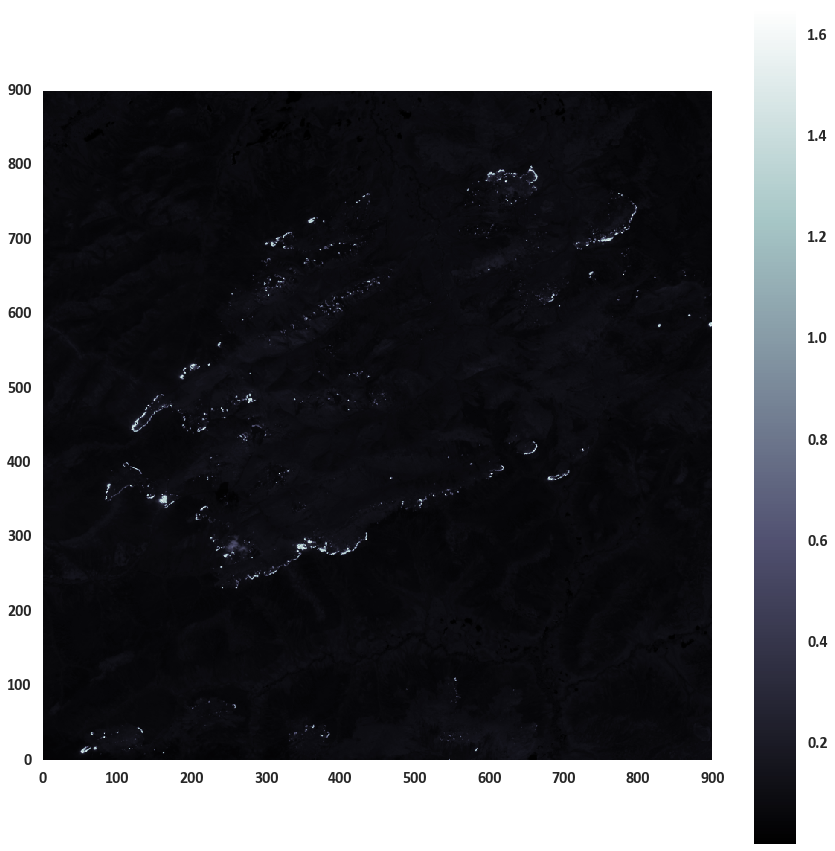

In [14]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_aspect('equal')
ax1.set_xlim((0, xmax))
ax1.set_ylim((0, ymax))
dataplot = ax1.pcolormesh(np.flipud(rho7))
cbar = fig1.colorbar(dataplot)

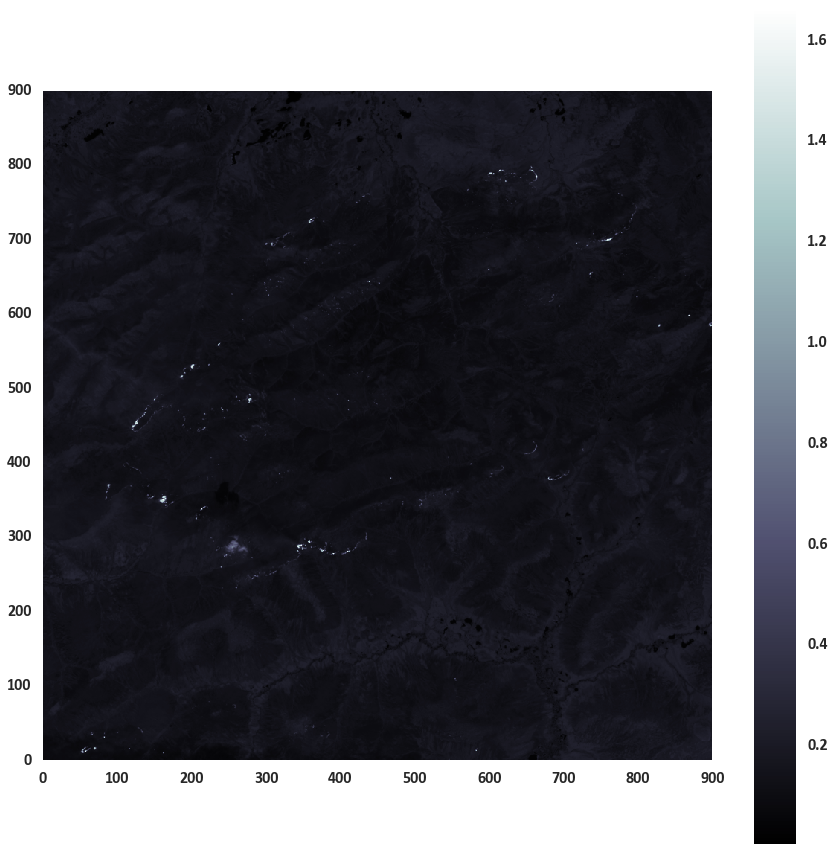

In [15]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_aspect('equal')
ax1.set_xlim((0, xmax))
ax1.set_ylim((0, ymax))
dataplot = ax1.pcolormesh(np.flipud(rho6))
cbar = fig1.colorbar(dataplot)

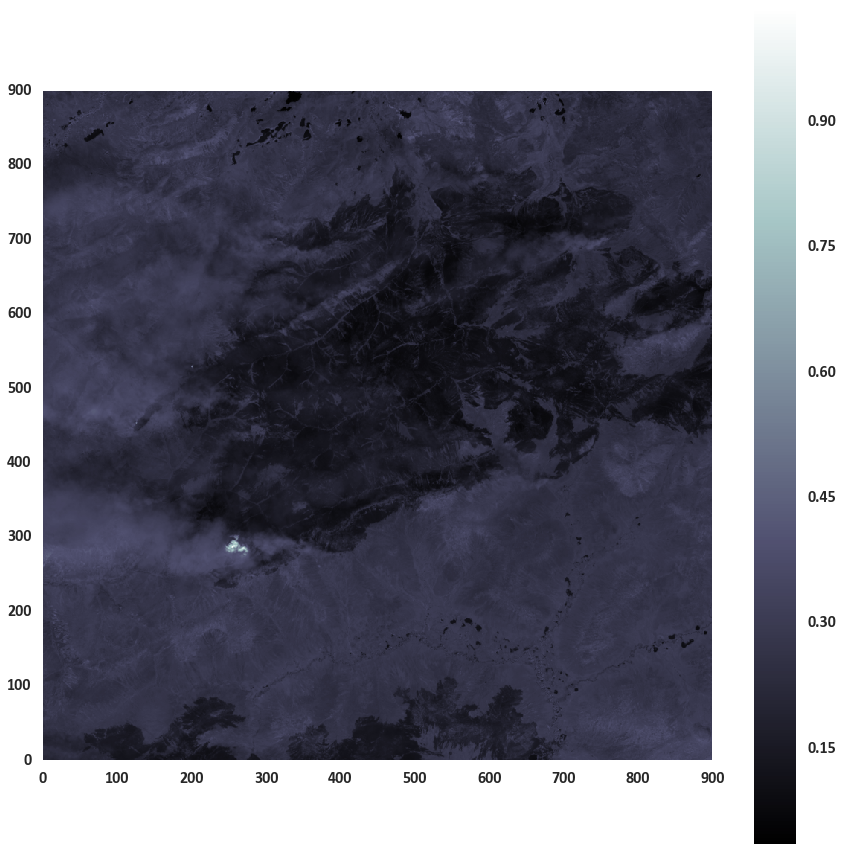

In [16]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_aspect('equal')
ax1.set_xlim((0, xmax))
ax1.set_ylim((0, ymax))
dataplot = ax1.pcolormesh(np.flipud(rho5))
cbar = fig1.colorbar(dataplot)

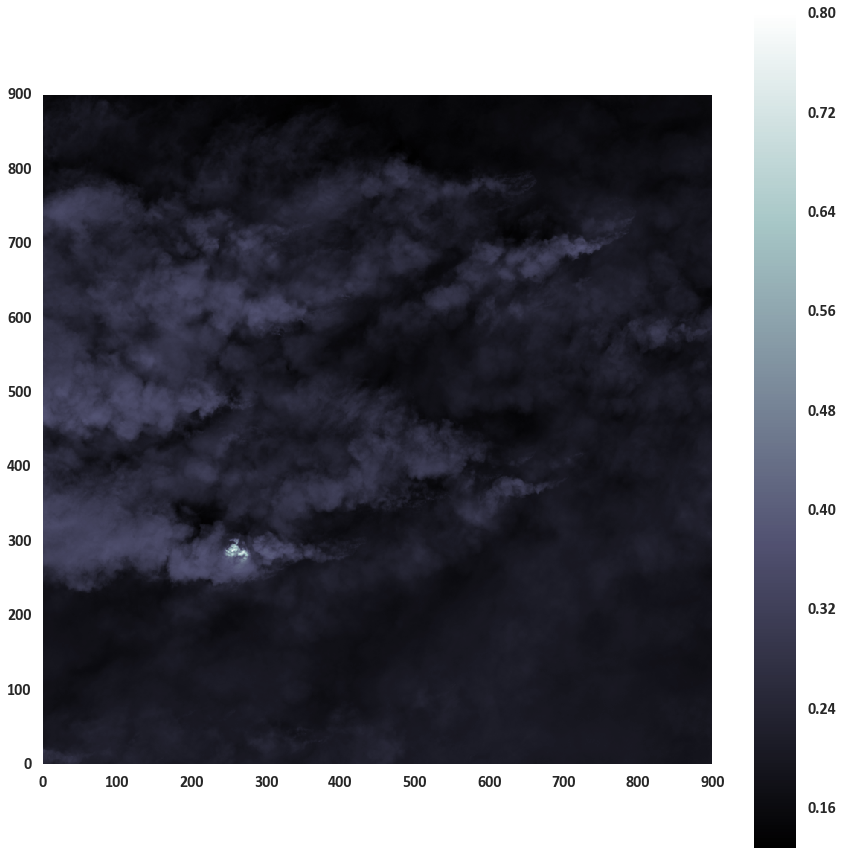

In [17]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_aspect('equal')
ax1.set_xlim((0, xmax))
ax1.set_ylim((0, ymax))
dataplot = ax1.pcolormesh(np.flipud(rho1))
cbar = fig1.colorbar(dataplot)

In [27]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_aspect('equal')
ax1.set_xlim((0, xmax))
ax1.set_ylim((0, ymax))
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title("Landsat 8 fire detections over band 5 (NIR) reflectance")
dataplot = ax1.pcolormesh(np.flipud(rho5))
maskplot3 = ax1.pcolormesh(np.flipud(firecond3_masked), cmap=cmap3, vmin=0, vmax=1)
maskplot2 = ax1.pcolormesh(np.flipud(firecond2_masked), cmap=cmap2, vmin=0, vmax=1)
maskplot1 = ax1.pcolormesh(np.flipud(firecond1_masked), cmap=cmap1, vmin=0, vmax=1)

KeyboardInterrupt: 

In [21]:
outfn = 'koyukuk_clip1_landsatB5_firemask.png'
fig1.savefig(os.path.join(productdir, outfn), dpi=200, bb_inches='tight')
#fig1.savefig(os.path.join(productdir, outfn))

In [18]:
landsat.meta['PRODUCT_METADATA']['DATE_ACQUIRED'], landsat.meta['PRODUCT_METADATA']['SCENE_CENTER_TIME']

(datetime.date(2015, 6, 15), datetime.time(21, 19, 17, 235388))

In [19]:
crs = from_string(landsat.band7.proj4)
samplerecords = newviirspolydf[
    (newviirspolydf['DATE'] == '2015-06-15') & 
    (newviirspolydf['GMT'] == '2128')]
firepolygons_h = samplerecords[(samplerecords['Type'] != 'L')]['geometry'].to_crs(crs)
firepolygons_l = samplerecords[(samplerecords['Type'] == 'L')]['geometry'].to_crs(crs)

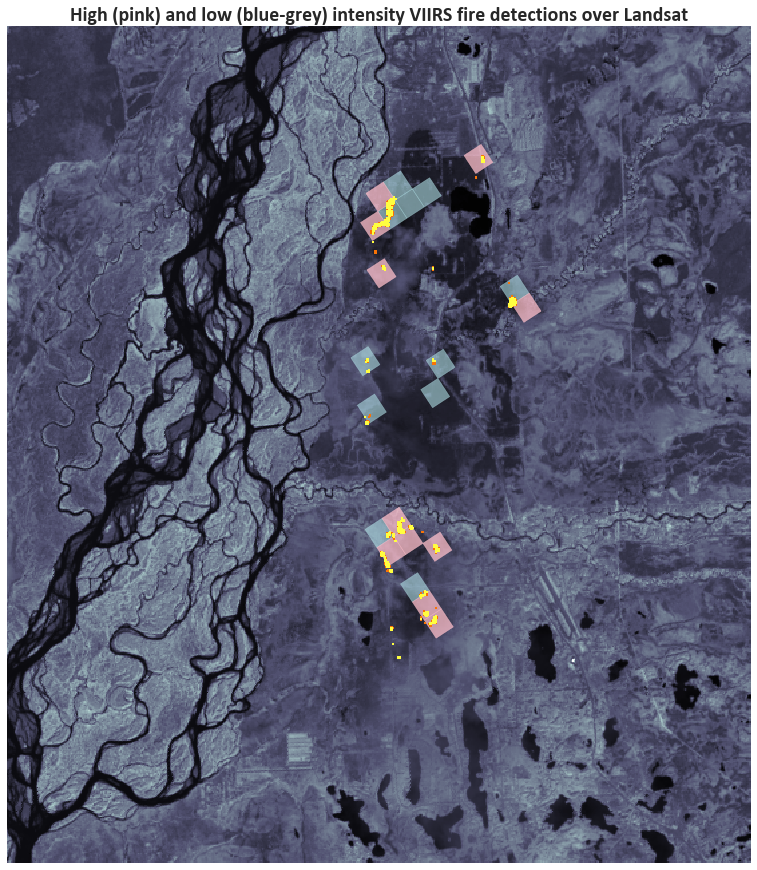

In [87]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_aspect('equal')
X, Y =  landsat.band5._XY
Y = np.flipud(Y)
ax1.set_xlim((X[0][0], X[0, -1]))
ax1.set_ylim((Y[0][0], Y[-1, 0]))
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.invert_yaxis()
ax1.set_title("High (pink) and low (blue-grey) intensity VIIRS fire detections over Landsat")
dataplot = ax1.pcolormesh(X, Y, rho5)
#maskplot3 = ax1.pcolormesh(firecond3_masked, cmap=cmap3, vmin=0, vmax=1)
patches = [PolygonPatch(poly, color='powderblue', alpha=0.6) for poly in firepolygons_l]
ax1.add_collection(PatchCollection(patches, match_original=True))
patches = [PolygonPatch(poly, color='pink', alpha=0.75) for poly in firepolygons_h]
ax1.add_collection(PatchCollection(patches, match_original=True))
maskplot3 = ax1.pcolormesh(X, Y, firecond3_masked, cmap=cmap3, vmin=0, vmax=1)
maskplot1 = ax1.pcolormesh(X, Y, firecond1_masked, cmap=cmap1, vmin=0, vmax=1)

In [88]:
outfn = 'sockeye_landsat_firemask_footprints.png'
fig1.savefig(os.path.join(productdir, outfn), dpi=200, bb_inches='tight')

In [22]:
samplerecords.to_crs(crs).head()

,AscNode,Bands,DATE,GMT,LAT,LON,Platform,Sensor,TB4,TB5,Type,ZenithAng,geometry
82,Y,I-Bands,2015-06-15,2128,61.751038,-150.102600,NPP,VIIRS,335.128174,298.115112,H,38.803452,"POLYGON ((652632.766615543 6849930.047028763, ..."
83,Y,I-Bands,2015-06-15,2128,61.754780,-150.107315,NPP,VIIRS,349.895752,301.983154,H,38.807564,"POLYGON ((652365.8389115523 6850336.434079315,..."
84,Y,I-Bands,2015-06-15,2128,61.766495,-150.101746,NPP,VIIRS,355.013184,300.098267,H,38.818520,"POLYGON ((652602.0489436168 6851653.395960519,..."
85,Y,I-Bands,2015-06-15,2128,61.768131,-150.113922,NPP,VIIRS,346.799561,302.516663,H,38.821274,"POLYGON ((651952.1488575009 6851808.12669848, ..."
86,Y,I-Bands,2015-06-15,2128,61.766029,-150.121414,NPP,VIIRS,341.631165,300.126343,H,38.819920,"POLYGON ((651569.3506060166 6851557.804345794,..."


In [23]:
firecond1idx = (ymax - np.where(firecond1)[0], np.where(firecond1)[1])
firecond1idx

(array([528, 527, 526, 526, 525, 525, 498, 497, 497, 497, 497, 496, 496,
        496, 496, 495, 495, 495, 495, 495, 494, 494, 494, 494, 494, 494,
        493, 493, 493, 493, 493, 492, 492, 492, 491, 491, 491, 491, 490,
        490, 490, 490, 489, 489, 488, 488, 488, 488, 487, 487, 487, 487,
        486, 486, 486, 486, 485, 485, 485, 484, 484, 483, 483, 482, 482,
        481, 481, 481, 481, 480, 480, 480, 480, 479, 479, 479, 479, 479,
        479, 478, 478, 478, 478, 478, 478, 478, 478, 478, 478, 478, 477,
        477, 477, 477, 477, 477, 476, 476, 475, 475, 475, 474, 474, 473,
        473, 472, 471, 465, 447, 445, 445, 445, 444, 423, 423, 422, 422,
        422, 422, 421, 421, 421, 421, 420, 420, 420, 420, 420, 419, 419,
        419, 419, 419, 418, 418, 418, 418, 418, 417, 417, 417, 416, 377,
        377, 376, 376, 376, 375, 369, 368, 368, 334, 330, 330, 329, 329,
        258, 257, 257, 256, 256, 255, 255, 254, 254, 254, 253, 253, 253,
        252, 252, 252, 252, 251, 251, 251, 251, 251

In [24]:
ymax

626

In [25]:
firepoints_h = [Point(lon, lat) 
    for lon, lat in zip(landsat.band7.Lon_pxcenter[firecond1idx], landsat.band7.Lat_pxcenter[firecond1idx])]


In [26]:
samplerecords['pointcount'] = 0

/Users/cwaigl/.virtualenvs/science276/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
for idx, record in samplerecords.iterrows():
    poly = record['geometry']
    for pt in firepoints_h:
        if pt.within(poly):
            samplerecords.loc[idx, 'pointcount'] += 1

/Users/cwaigl/.virtualenvs/science276/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
samplerecords.groupby('Type').describe()

LAT         LON         TB4         TB5  ZenithAng  \
Type                                                                   
H    count  11.000000   11.000000   11.000000   11.000000  11.000000   
     mean   61.793388 -150.105768  344.568071  300.853560  38.845261   
     std     0.036143    0.020399    8.471797    2.514393   0.035084   
     min    61.751038 -150.122116  332.352295  297.609680  38.803452   
     25%    61.766262 -150.119774  338.379669  299.106689  38.819220   
     50%    61.771881 -150.113922  342.657532  300.512451  38.825390   
     75%    61.826797 -150.102173  352.180267  302.249908  38.879450   
     max    61.844131 -150.059250  355.449951  305.047363  38.892292   
L    count  11.000000   11.000000   11.000000   11.000000  11.000000   
     mean   61.808421 -150.107943  327.166457  303.650080  38.860198   
     std     0.027625    0.018421    5.183862    5.329771   0.026620   
     min    61.758530 -150.128815  320.435852  297.988770  38.811684   
     25%    61.796137 -150.120331  323.863251  299.227783  38.848665   
     50%    61.804462 -150.111740  326.659760  301.934021  38.858276   
     75%    61.834726 -150.099609  328.505096  307.111252  38.886246   
     max    61.839516 -150.064011  338.098206  314.724457  38.891026   

            pointcount  
Type                    
H    count   11.000000  
     mean    15.090909  
     std     11.049476  
     min      2.000000  
     25%      6.500000  
     50%     14.000000  
     75%     21.000000  
     max     37.000000  
L    count   11.000000  
     mean     9.454545  
     std     14.861787  
     min      0.000000  
     25%      1.000000  
     50%      3.000000  
     75%      9.500000  
     max     50.000000

(-2, 57)

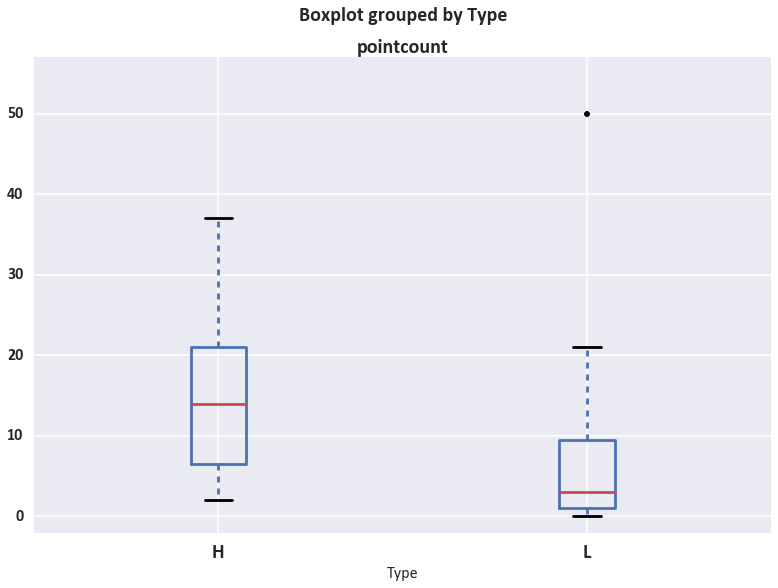

In [68]:
samplerecords[['pointcount', 'Type']].boxplot(column='pointcount', by='Type', sym='k.')
ax = plt.gca()
ax.set_ylim(-2, 57)


In [41]:
myfig = plt.gcf()
outfn = 'sockeye_landsat_firematch_boxplot.png'
myfig.savefig(os.path.join(productdir, outfn), dpi=200, bb_inches='tight')

(-2, 57)

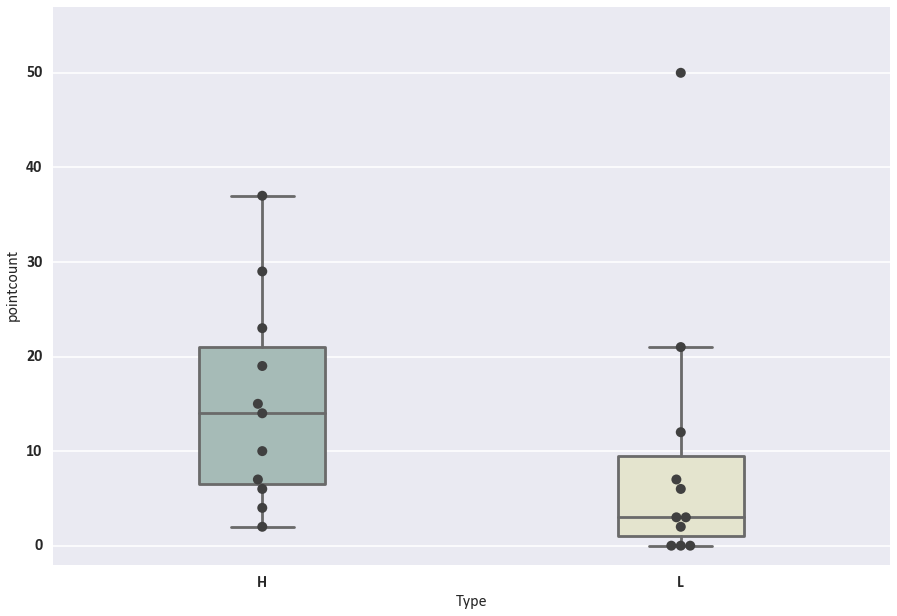

In [66]:
fig2 = plt.figure(1, figsize=(15, 10))
ax2 = fig2.add_subplot(111)
sns.boxplot(x='Type', y='pointcount', data=samplerecords,
    palette="Set3", saturation=0.3, width=.3, ax=ax2)
sns.swarmplot(
    x='Type', y='pointcount', data=samplerecords, color=".25", size=10, ax=ax2)
ax2.set_ylim(-2, 57)

In [67]:
outfn = 'sockeye_landsat_firematch_boxplot.png'
fig2.savefig(os.path.join(productdir, outfn), dpi=200, bb_inches='tight')

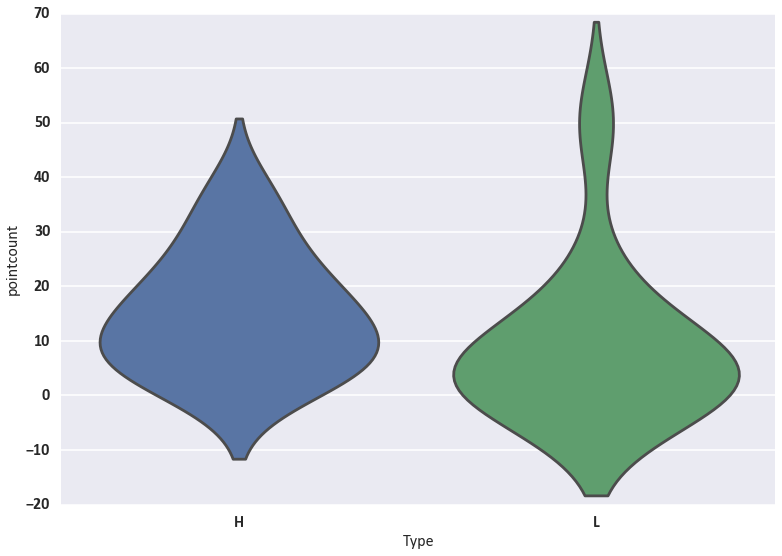

In [48]:
ax = sns.violinplot(x='Type', y='pointcount', data=samplerecords, inner=None)